In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

1 - Nettoyage de données

In [ ]:
# Télécharger les stopwords (mots vides) pour les traitements de texte
nltk.download('stopwords')
# Télécharger WordNet, une base de données lexicales pour l'analyse sémantique
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Import du fichier source
data = pd.read_csv(r'C:\Users\Ines\OneDrive\Bureau\Documents\Portfolio\Reviews.csv')
#Afficher les 5 premieres lignes
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Enlever les lignes vides
data_cleaned = data.dropna(subset=['Text'])  
data_cleaned['Cleaned_Text'] = data_cleaned['Text'].str.lower().str.translate(
    str.maketrans('', '', string.punctuation))  # rendre le text en miniscule et enlever la ponctuation

In [ ]:
# Enlever les Stopwords
stop_words = set(stopwords.words('english'))
data_cleaned['Cleaned_Text'] = data_cleaned['Cleaned_Text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
from bs4 import BeautifulSoup

# Fonction pour enlever les tags HTML
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Appliquer la fonction
data_cleaned['Cleaned_Text'] = data_cleaned['Text'].apply(remove_html_tags)

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\161817953.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [ ]:
# Lemmatization du dataset
lemmatizer = WordNetLemmatizer()
data_cleaned['Cleaned_Text'] = data_cleaned['Cleaned_Text'].apply(
    lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [62]:
#afiichage du dataset nettoyé
data_cleaned.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wide...,Positive


2 - Exploration des données

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\3375209060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Score', palette='viridis')


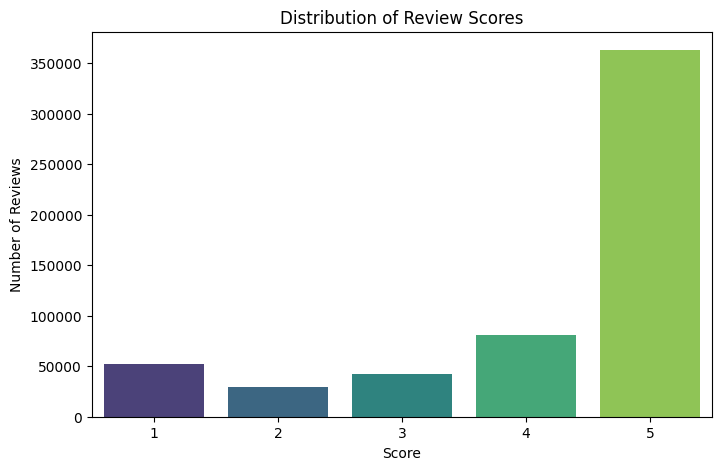

In [ ]:
# Distribution des scores
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Score', palette='viridis')
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.show()

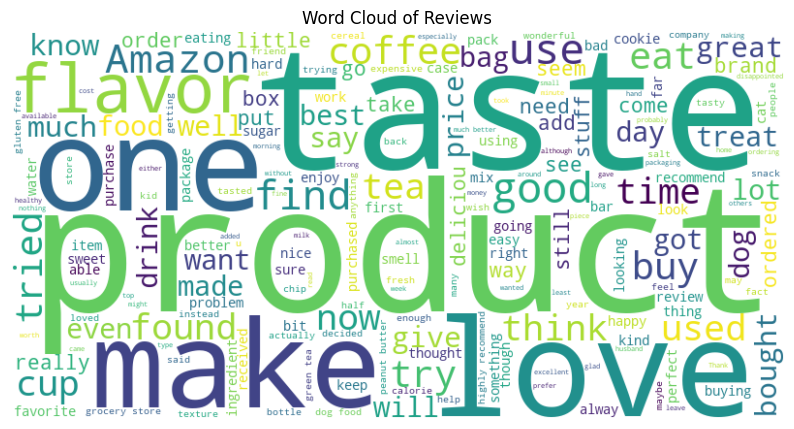

In [ ]:
# Nuage de mots les plus fréquent à partir des avis
all_text = ' '.join(data_cleaned['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

In [ ]:
# Sortir les 10 mots les plus fréquents avec leurs count
print("Top 10 Most Frequent Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 10 Most Frequent Words:
I: 1388087
like: 246770
The: 194512
taste: 163323
one: 148842
This: 139555
good: 138096
It: 137741
love: 136602
product: 117785


C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\284856085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


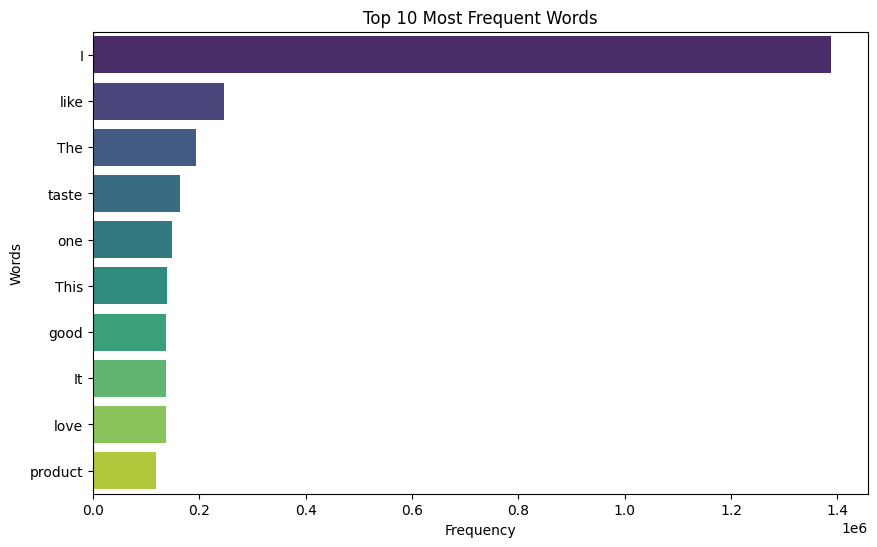

In [ ]:
# Un diagramme en barres pour afficher les mots les plus fréquents
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


3 - Sentiment Analysis

In [ ]:
# Foncion qui définit les labels des sentiments basés sur les scores
def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

data_cleaned['Sentiment'] = data_cleaned['Score'].apply(label_sentiment)

In [44]:
data_cleaned['Sentiment'] 

0         Positive
1         Negative
2         Positive
3         Negative
4         Positive
            ...   
568449    Positive
568450    Negative
568451    Positive
568452    Positive
568453    Positive
Name: Sentiment, Length: 568454, dtype: object

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\690700341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')


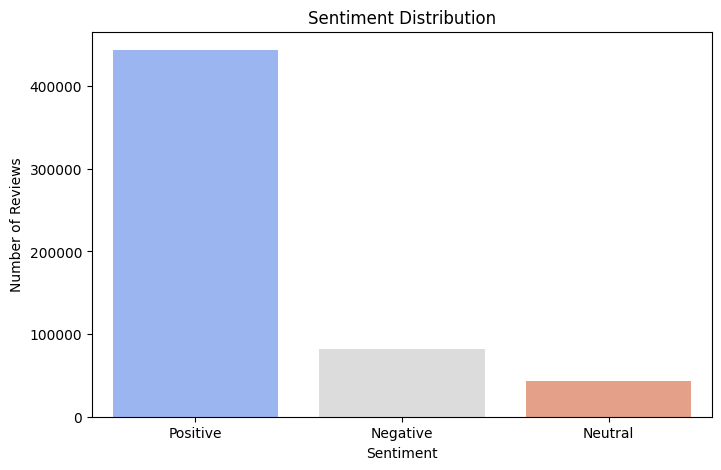

In [ ]:
# Visualisation de la distribution des sentiments
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [40]:
print(data_cleaned.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Cleaned_Text'],
      dtype='object')


4 - Régression logistique

In [ ]:
#convertir les textes en vecteurs de caractéristiques numériques avec TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data_cleaned['Cleaned_Text']).toarray()
#Définit la cible (sentiments) à partir des données nettoyées
y = data_cleaned['Sentiment']


In [ ]:
# Mapper les étiquettes de sentiments à des valeurs numériques
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y = y.map(label_mapping)

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialisation du modèle de régression logistique avec un maximum de 1000 itérations
model = LogisticRegression(max_iter=1000)
# Entraînement du modèle sur les données d'entraînement (X_train, y_train)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Évaluer les performances du modèle
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_mapping.keys()))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.69      0.71     16181
     Neutral       0.53      0.20      0.29      8485
    Positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.72      0.62      0.65    113691
weighted avg       0.85      0.87      0.86    113691

Accuracy: 0.871141954948061


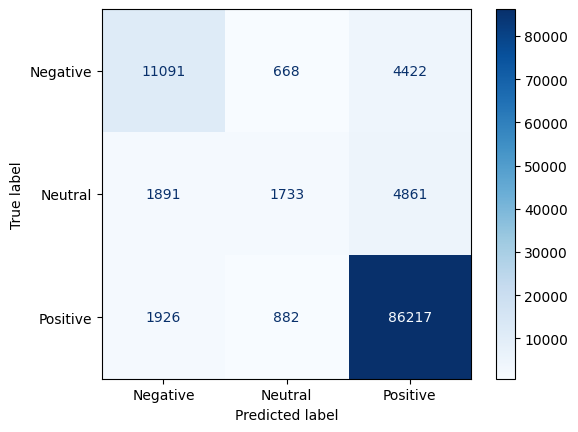

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=label_mapping.keys()).plot(cmap='Blues')
plt.show()

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\1435042009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words, palette='coolwarm')


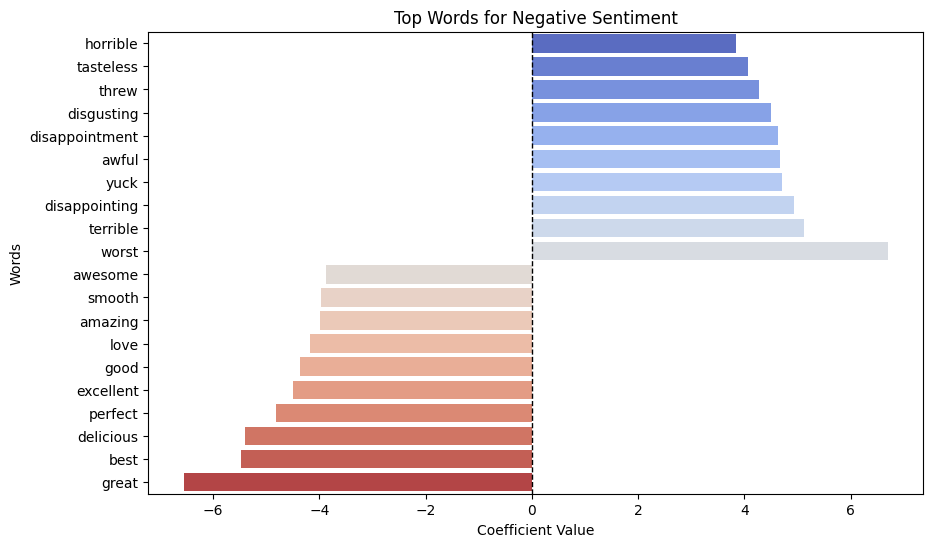

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\1435042009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words, palette='coolwarm')


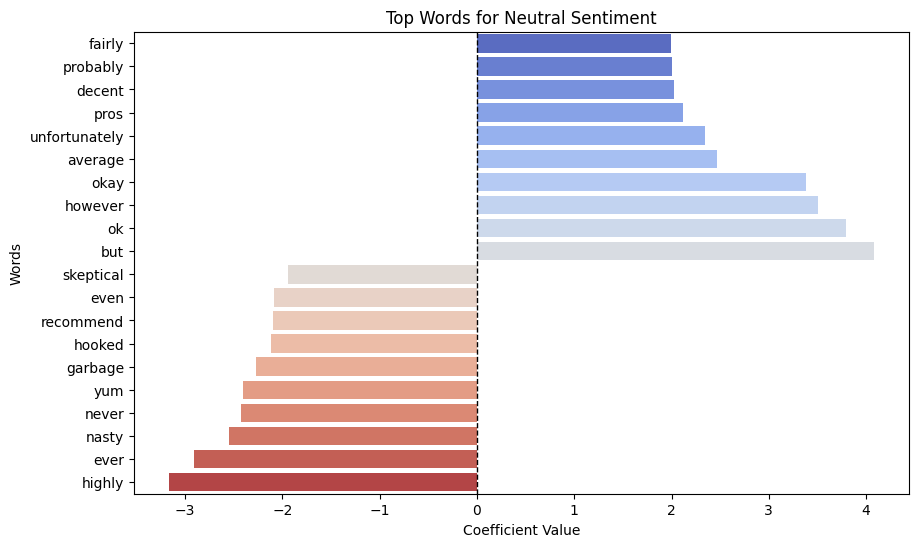

C:\Users\Ines\AppData\Local\Temp\ipykernel_39396\1435042009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=words, palette='coolwarm')


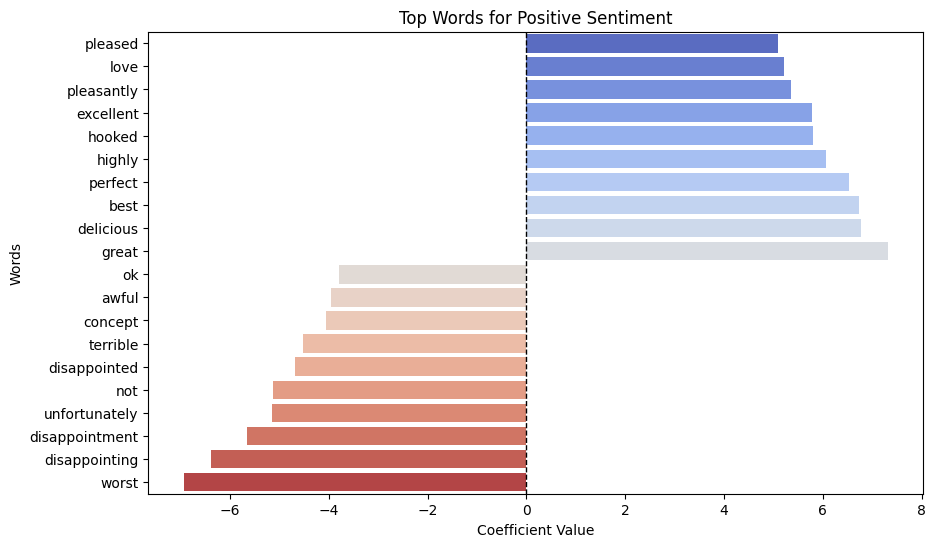

In [ ]:
# Extraire l'importance des caractéristiques à partir des coefficients de la régression logistique

# Obtenir les noms des caractéristiques (mots) à partir du vecteur TF-IDF
feature_names = tfidf.get_feature_names_out()

# Récupérer les coefficients associés à chaque mot pour chaque classe de sentiment
coefficients = model.coef_

# Visualiser les 10 mots les plus positifs et négatifs pour chaque sentiment
for i, sentiment in enumerate(label_mapping.keys()):
    # Trier les indices des coefficients de la classe courante
    sorted_indices = np.argsort(coefficients[i])  # Indices triés par coefficient

    # Récupérer les 10 mots avec les coefficients les plus positifs (influence élevée)
    top_positive_words = [feature_names[j] for j in sorted_indices[-10:]]

    # Récupérer les 10 mots avec les coefficients les plus négatifs (influence faible)
    top_negative_words = [feature_names[j] for j in sorted_indices[:10]]

    # Combiner les mots et coefficients pour une visualisation claire
    words = top_positive_words + top_negative_words[::-1]  # Mots positifs et négatifs inversés
    scores = coefficients[i][sorted_indices[-10:]].tolist() + coefficients[i][sorted_indices[:10]].tolist()[::-1]

    # Création d'un graphique en barres
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=words, palette='coolwarm')  
    plt.title(f"Top Words for {sentiment} Sentiment")  
    plt.xlabel("Coefficient Value")  
    plt.ylabel("Words")  
    plt.axvline(0, color='black', linestyle='--', linewidth=1)  
    plt.show()
